<a href="https://colab.research.google.com/github/mwaza/Artificial-intelligent-Work/blob/master/LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

It tries to solve classification problem.It predicts whether the patient diagonised with breast cancer,the cancer is malignant or benign.

so data is loaded from sklearn

In [ ]:

from sklearn.datasets import load_breast_cancer

In [ ]:

data=load_breast_cancer()

Check the type of 'data'

In [ ]:

type(data)

sklearn.utils.Bunch

it is used as a Bunch object
this basically acts like a dictionary where you can treat keys like attributes

In [ ]:

data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

'data' (the attribute) means the input data
It has 569 samples, 30 features

In [ ]:

data.data.shape



(569, 30)

'targets'
note how the targets are just 0s and 1s
normally,when you have k targets,they are labeled 0..k-1.Therefore the data is stored in terms of 0's and 1's but that doesnt mean it has lost value

In [ ]:

data.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

there meaning is not lost

In [ ]:

data.target_names

array(['malignant', 'benign'], dtype='<U9')

there are also 569 corresponding targets

In [ ]:

data.target.shape


(569,)

you can also determine the meaning of each feature

In [ ]:

data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

normally we would put all our imports at the top
but this lets us tell a story
split the data into train and test sets
this lets us simulate how our model will perfom in the future

In [ ]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)
N, D=x_train.shape

NameError: ignored

Scale data  since output is a linear cobination of input ,we dont want one input to have small range like 0.01 while the other has one million therefore we scale.

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

NameError: ignored

we use tensorflow to create layers which are nodes specifically (ANN) with activation function  being Sigmoid.The activation function generally controls the output.Split the data into train and test sets
this lets us simulate how our model will perfom in the future

In [ ]:

model=tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#train the model
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)


#evaluate the model-evaluate() returns loss and accuracy
print("train Score:",model.evaluate(x_train,y_train))
print("test Score:",model.evaluate(x_test,y_test))


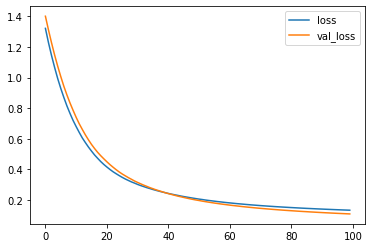

In [ ]:
#plot what's returned by the model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

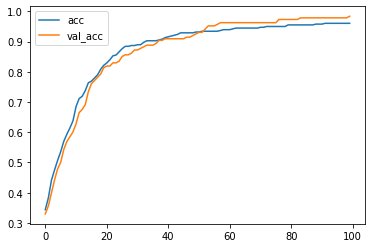

In [ ]:
#plot accuracy too
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()